<a href="https://colab.research.google.com/github/Gakarau/IP-Moringa/blob/main/Independent_Project%20Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The Dataset and Its Characteristics
#Library selection
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv("/content/Finstuff.csv")


In [3]:
#Dataset Characteristics 
data.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#Dataset charactertics 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
#Dataset characteristics 
data.shape

(23524, 13)

In [7]:
#Dataset characteristics i.e NULL VALUES 
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#Null values are present in the data 


In [22]:
#drop null values 
Data1=data.dropna()

In [23]:
#check for null values again 
Data1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

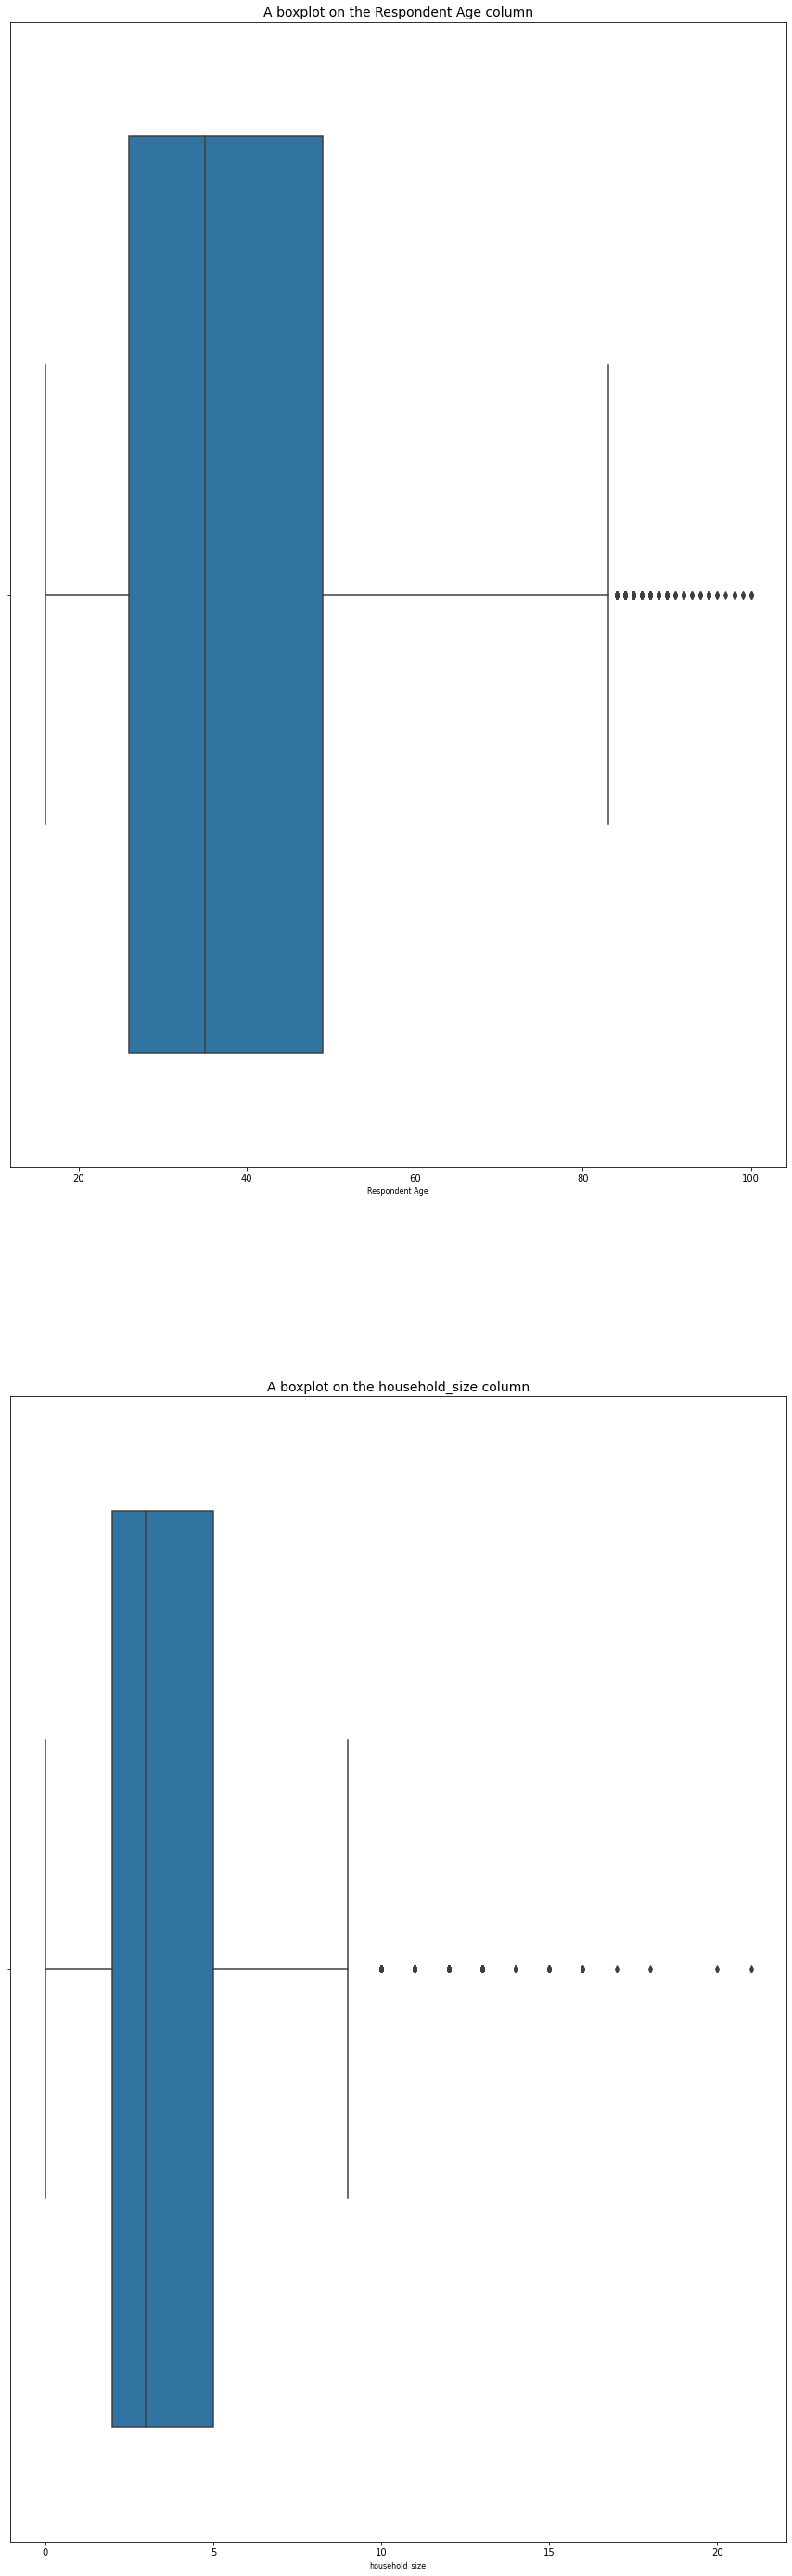

In [24]:
#Checking for outliers 
col_names = ["Respondent Age", "household_size"]
fig, ax = plt.subplots(len(col_names), figsize = (15,50))
for i, col_val in enumerate(col_names):
    sns.boxplot(x = Data1[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

Text(0.5, 1.0, 'Age Distribution')

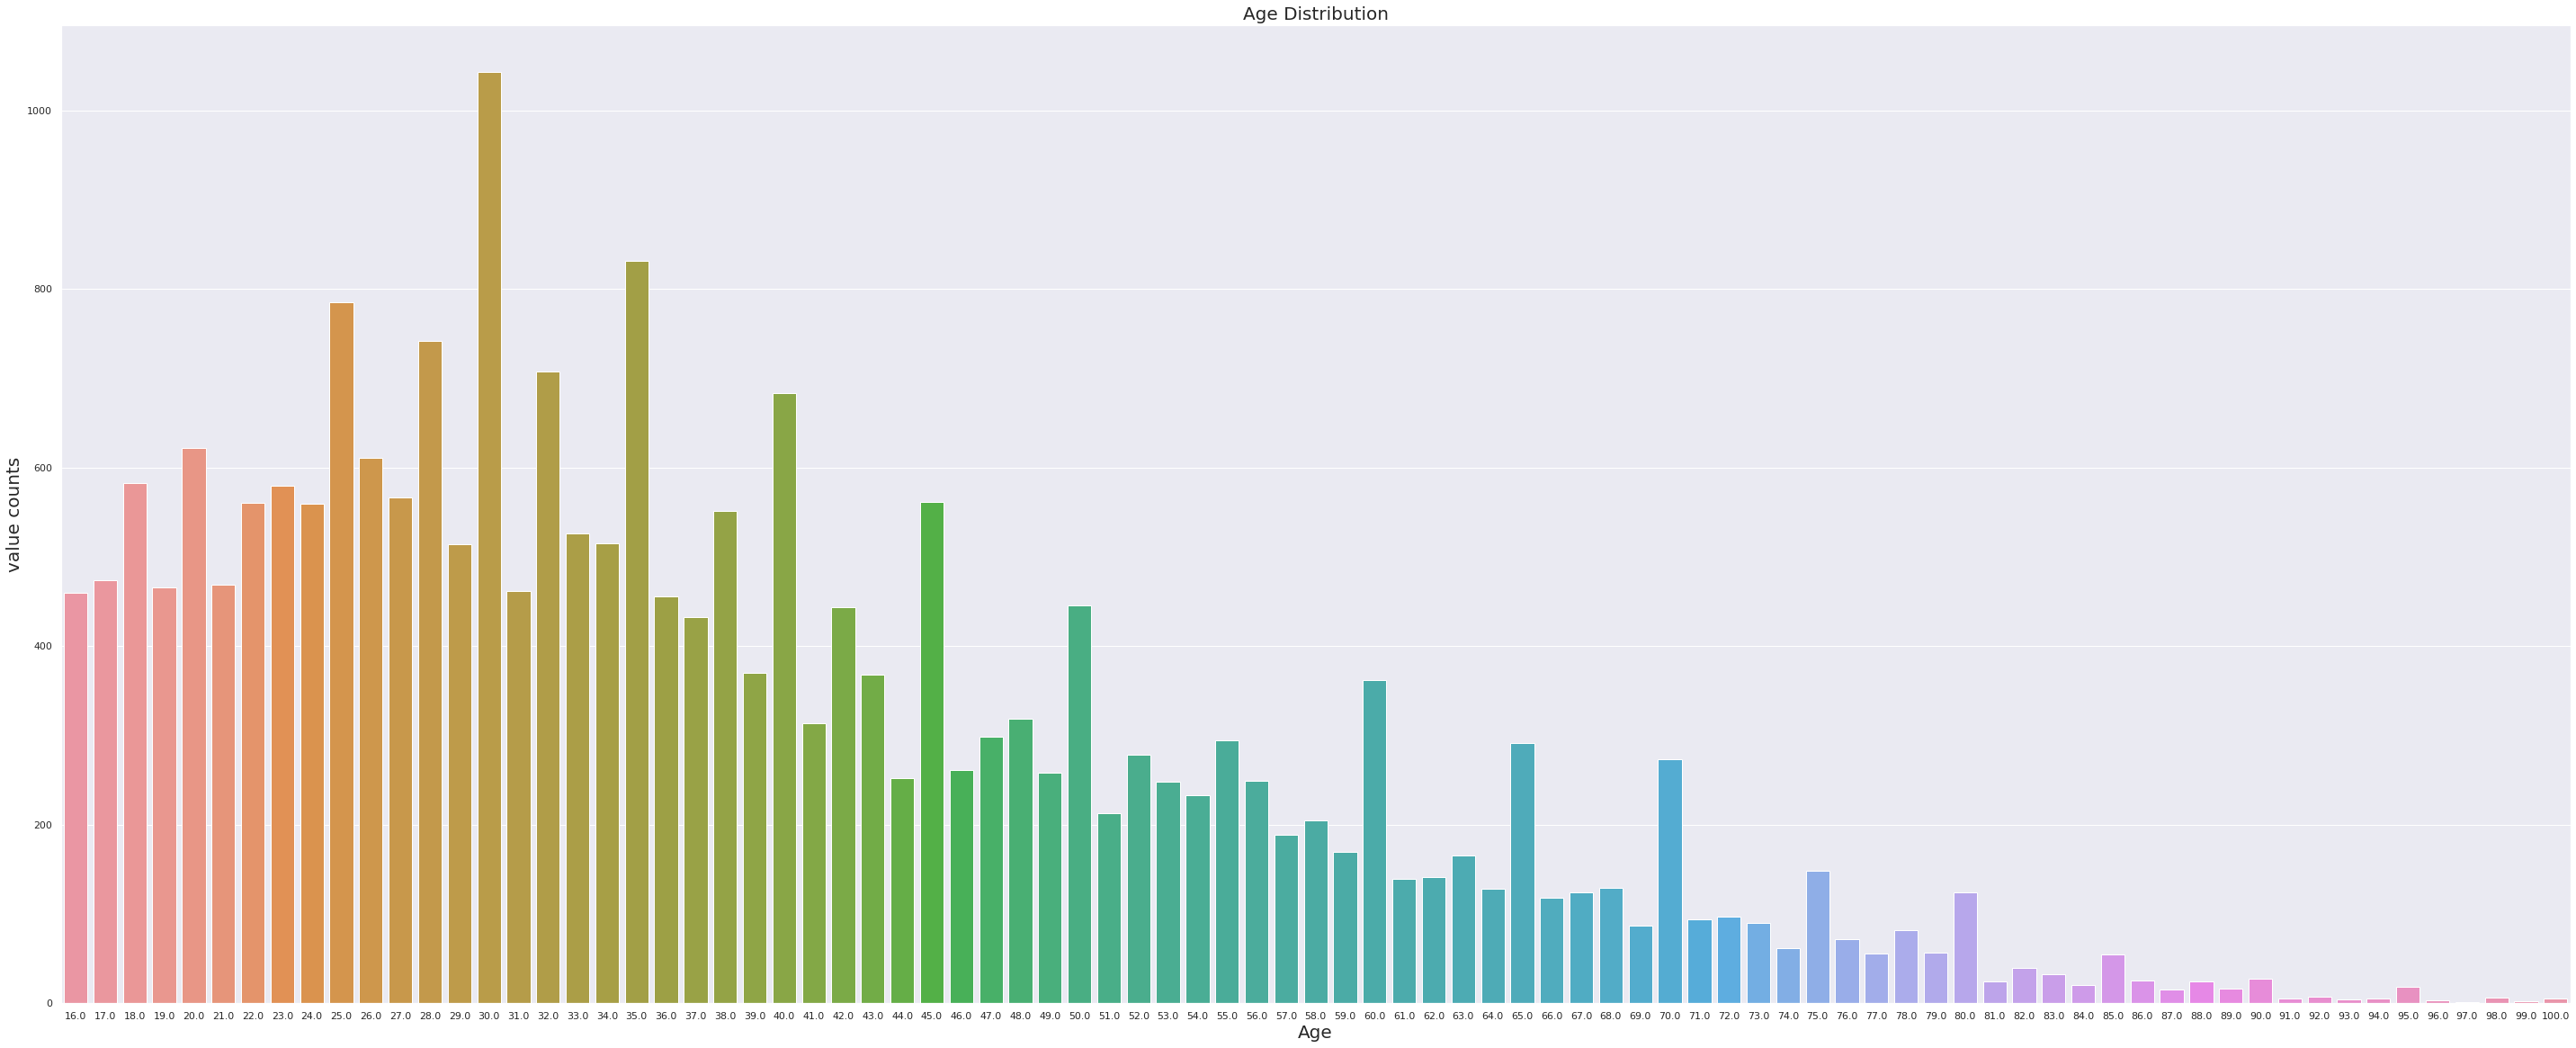

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(50,20)
sns.countplot(x='Respondent Age', data=Data1)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('value counts', fontsize=20)
ax.set_title('Age Distribution', fontsize=20)

In [25]:
#Confirming the number of outliers 
DData = Data1[["Respondent Age", "household_size"]]
Q1 = DData.quantile(0.25)
Q3 = DData.quantile(0.75)
IQR = Q3 - Q1
((DData < (Q1 - 1.5 * IQR)) | (DData > (Q3 + 1.5 * IQR))).sum()

Respondent Age    239
household_size    376
dtype: int64

In [ ]:
#This dataset contains multiple outliers, dropping them here may affect the quality of the analysis

In [26]:
#Analyzing the data for duplicates 
len(Data1)-len(Data1.drop_duplicates())

0

In [ ]:
#Eureka! No duplicates

In [27]:
#Understanding how different variables appear in the study
#Importing the necesssary visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt 


Text(0.5, 1.0, 'Gender Distribution in Entire Dataset')

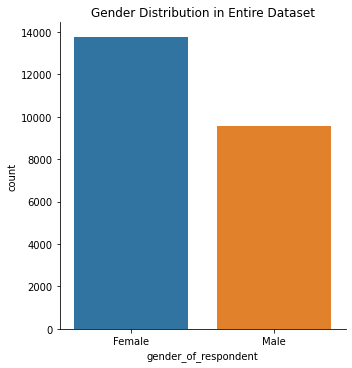

In [28]:
#Univariate analysis 
#Participants based on gender 
sns.catplot (x="gender_of_respondent", kind="count", data=Data1)
plt.title("Gender Distribution in Entire Dataset")


Text(0.5, 1.0, 'Participant Distribution based on Location')

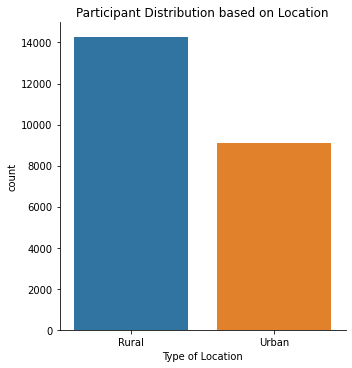

In [29]:
#Univariate Analysis 
#How many participants are from rural or urban areas? 
sns.catplot (x="Type of Location", kind= "count", data = Data1)
plt.title ("Participant Distribution based on Location")

In [ ]:
#The numbers above suggest that most of the participants are in rural areas. 

Text(0.5, 1.0, 'Number of Participants with Cellphone Access')

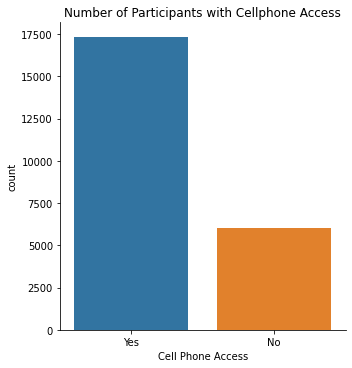

In [30]:
sns.catplot (x= "Cell Phone Access", kind ="count", data=Data1)
plt.title ("Number of Participants with Cellphone Access")

In [ ]:
#Smartphone access is quite prevalent in the region. 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

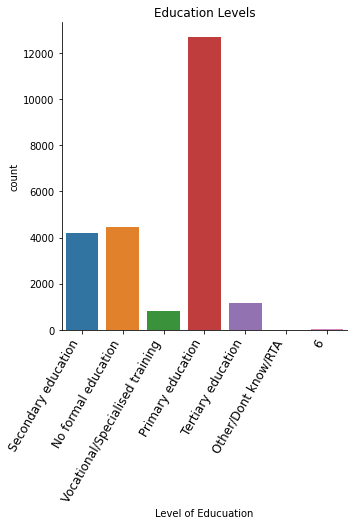

In [31]:
sns.catplot(x="Level of Educuation", kind="count", data=Data1)
plt.title("Education Levels")

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

In [ ]:
#Evidence suggests that most of the population is at least primary school educated. However, the persons may have limited access top higher levels of tertiary education. The transition from primary to tertiary education is rather restrictive. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

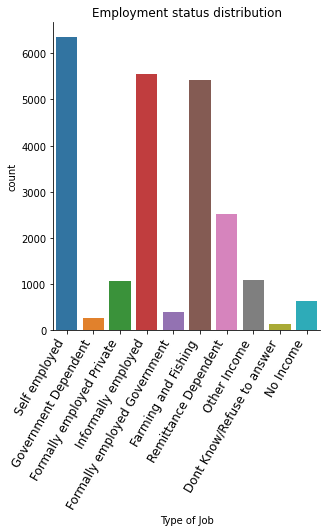

In [32]:
sns.catplot(x="Type of Job", kind="count", data=Data1)
plt.title("Employment status distribution")

plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

In [ ]:
#Most of the individuals in the region are self-employed, informally employed, or depenedent on fishing  

In [53]:
#Convert columns to categories
Data1[['Has a Bank account','Level of Educuation', 'marital_status', 'gender_of_respondent', 'Type of Location', 'The relathip with head', 'Type of Job', 'Cell Phone Access']]= Data1[['Has a Bank account','Level of Educuation', 'marital_status', 'gender_of_respondent', 'Type of Location', 'The relathip with head', 'Type of Job', 'Cell Phone Access']].astype('category')
Data1.dtypes

country                     object
year                         int64
uniqueid                    object
Has a Bank account        category
Type of Location          category
Cell Phone Access         category
household_size             float64
Respondent Age             float64
gender_of_respondent      category
The relathip with head    category
marital_status            category
Level of Educuation       category
Type of Job               category
dtype: object

In [59]:

Data1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job,Has a Bank account cat
0,Kenya,2018,uniqueid_1,0,0,0,3.0,24.0,1,2,0,1,4,0
1,Kenya,2018,uniqueid_2,1,0,1,5.0,70.0,1,1,2,5,3,1
2,Kenya,2018,uniqueid_3,0,1,0,5.0,26.0,0,4,1,Vocational/Specialised training,4,0
3,Kenya,2018,uniqueid_4,1,0,0,5.0,34.0,1,1,0,0,2,1
4,Kenya,2018,uniqueid_5,1,1,1,8.0,26.0,0,0,1,0,0,1


**Exploratory Data Analysis**

In [65]:
#Before making some columns into categorical variables
data.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [63]:
#Mean 
Data1.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


year                      2016.980594
household_size               3.688643
Respondent Age              38.805509
Has a Bank account cat       0.858759
dtype: float64

In [64]:
#Median 
Data1.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


year                      2017.0
household_size               3.0
Respondent Age              35.0
Has a Bank account cat       1.0
dtype: float64

In [82]:
#Standard deviation 
col = ['household_size', 'Respondent Age']
x={}
for col in col: 
  x[col] = Data1[col].std()

z = pd.Series(x)
z= z.to_numpy()
z

Standa = {'Column': ['household_size', 'Respondent Age'], 
       'Standard Deviation': [2.28118353, 16.5198035 ]} 
std =pd.DataFrame(Standa)
std

,Column,Standard Deviation
0,household_size,2.281184
1,Respondent Age,16.519803


In [69]:
#Variance 
col = ['household_size', 'Respondent Age']
x={}
for col in col: 
  x[col] = Data1[col].var()

z = pd.Series(x)
z= z.to_numpy()
z



array([  5.20379827, 272.90390761])

In [74]:
#Variance tabulated 
Varia = {'Column': ['household_size', 'Respondent Age'], 
       'Variance': [5.20379827, 272.90390761]} 
var =pd.DataFrame(Varia)
var

,Column,Variance
0,household_size,5.203798
1,Respondent Age,272.903908


In [71]:
#kurtosis 
col = ['household_size', 'Respondent Age']
x={}
for col in col: 
  x[col] = Data1[col].kurt()

z = pd.Series(x)
z= z.to_numpy()
z

array([1.15386907, 0.09844652])

In [75]:
#Tabulation of kurtosis 
Kurto = {'Column': ['household_size', 'Respondent Age'], 
       'Kurtosis': [1.15386907, 0.09844652]} 
var =pd.DataFrame(Kurto)
var

,Column,Kurtosis
0,household_size,1.153869
1,Respondent Age,0.098447


In [73]:
#Skewness 
col = ['household_size', 'Respondent Age']
x={}
for col in col: 
  x[col] = Data1[col].skew()

z = pd.Series(x)
z= z.to_numpy()
z


array([0.97410868, 0.84066175])

In [77]:
Skeww = {'Column': ['household_size', 'Respondent Age'], 
       'Skew': [0.97410868, 0.84066175]} 
var =pd.DataFrame(Skeww)
var

,Column,Skew
0,household_size,0.974109
1,Respondent Age,0.840662


***Bivariate Analysis*** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

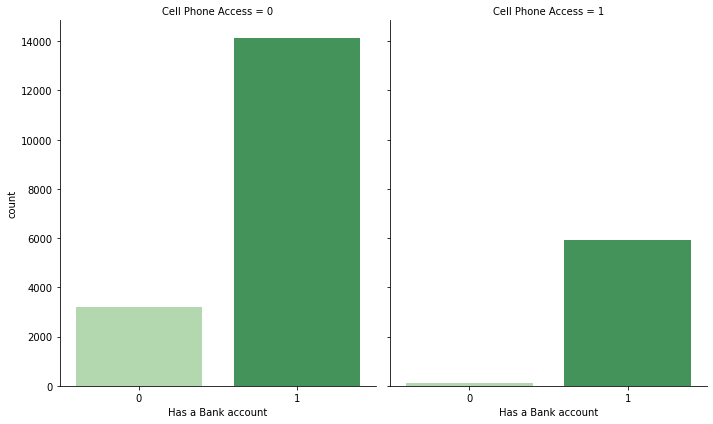

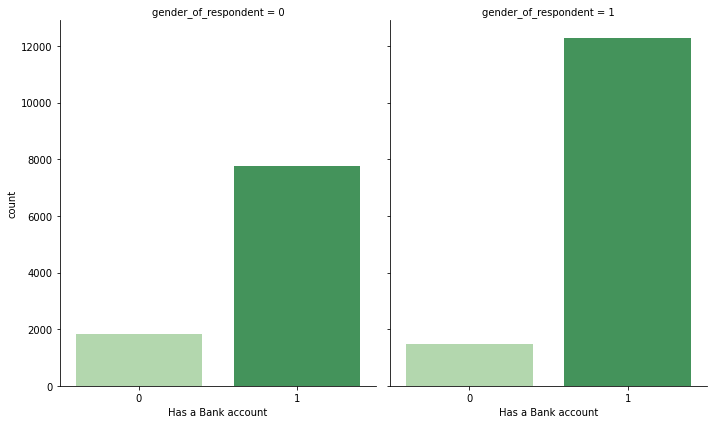

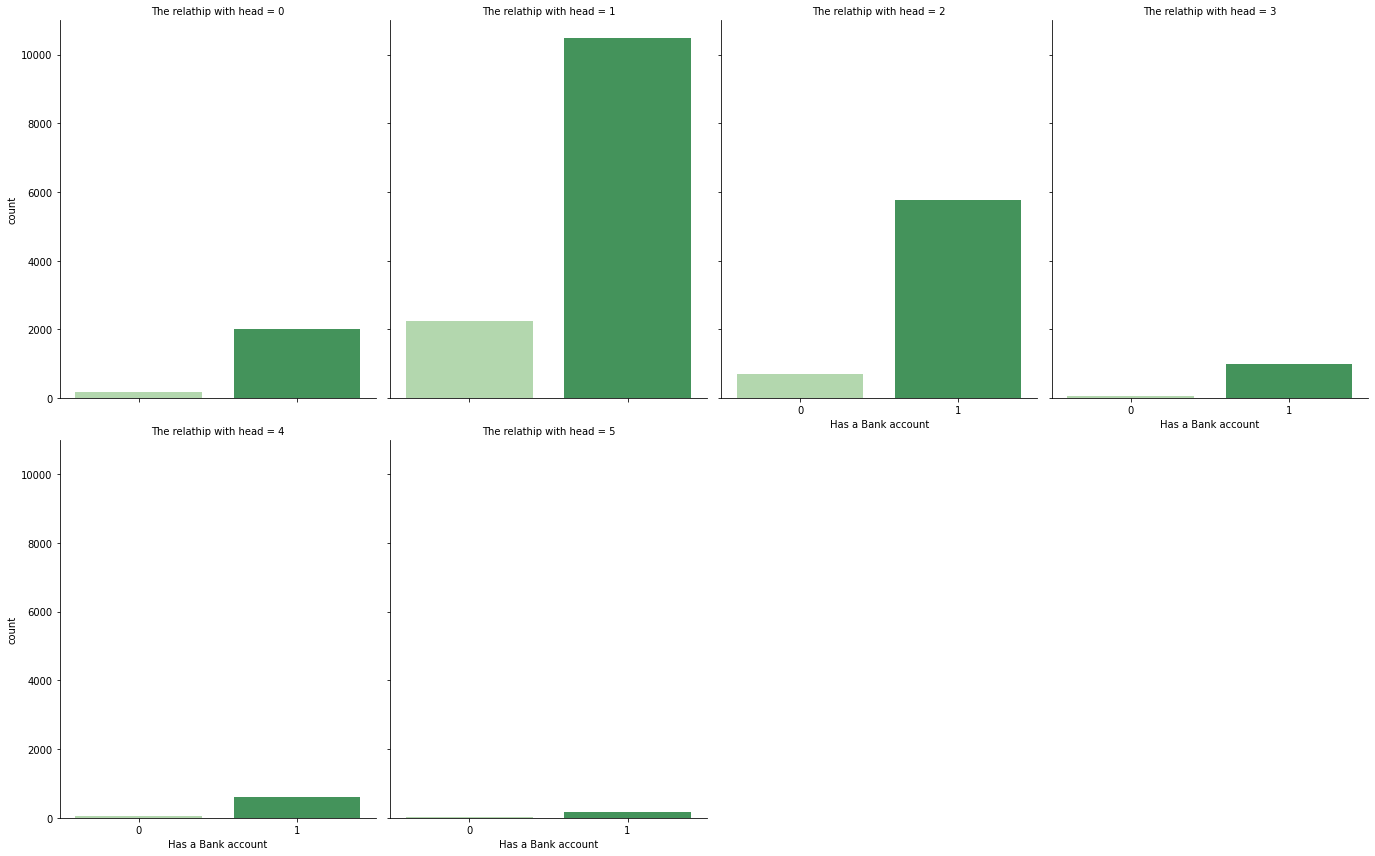

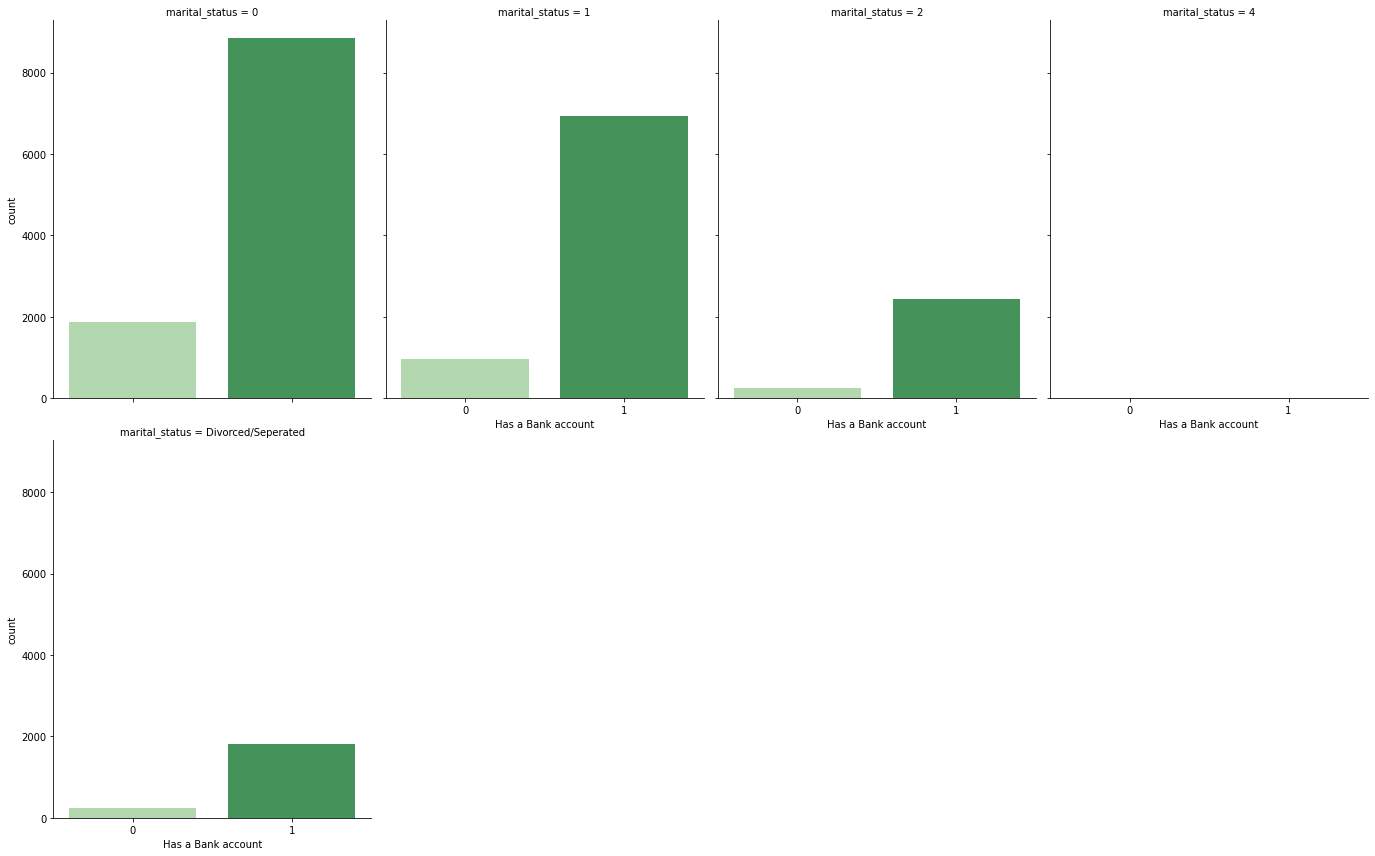

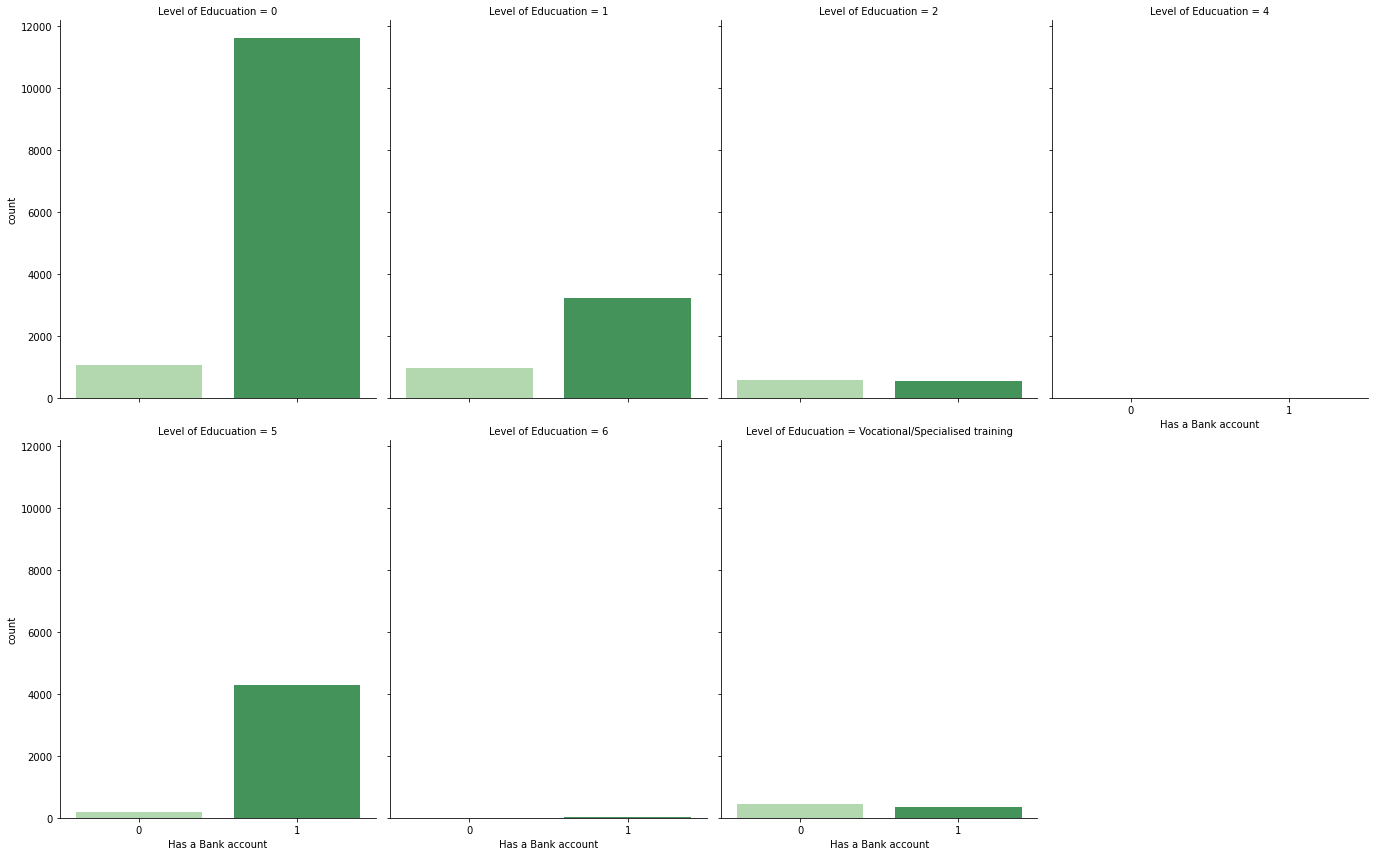

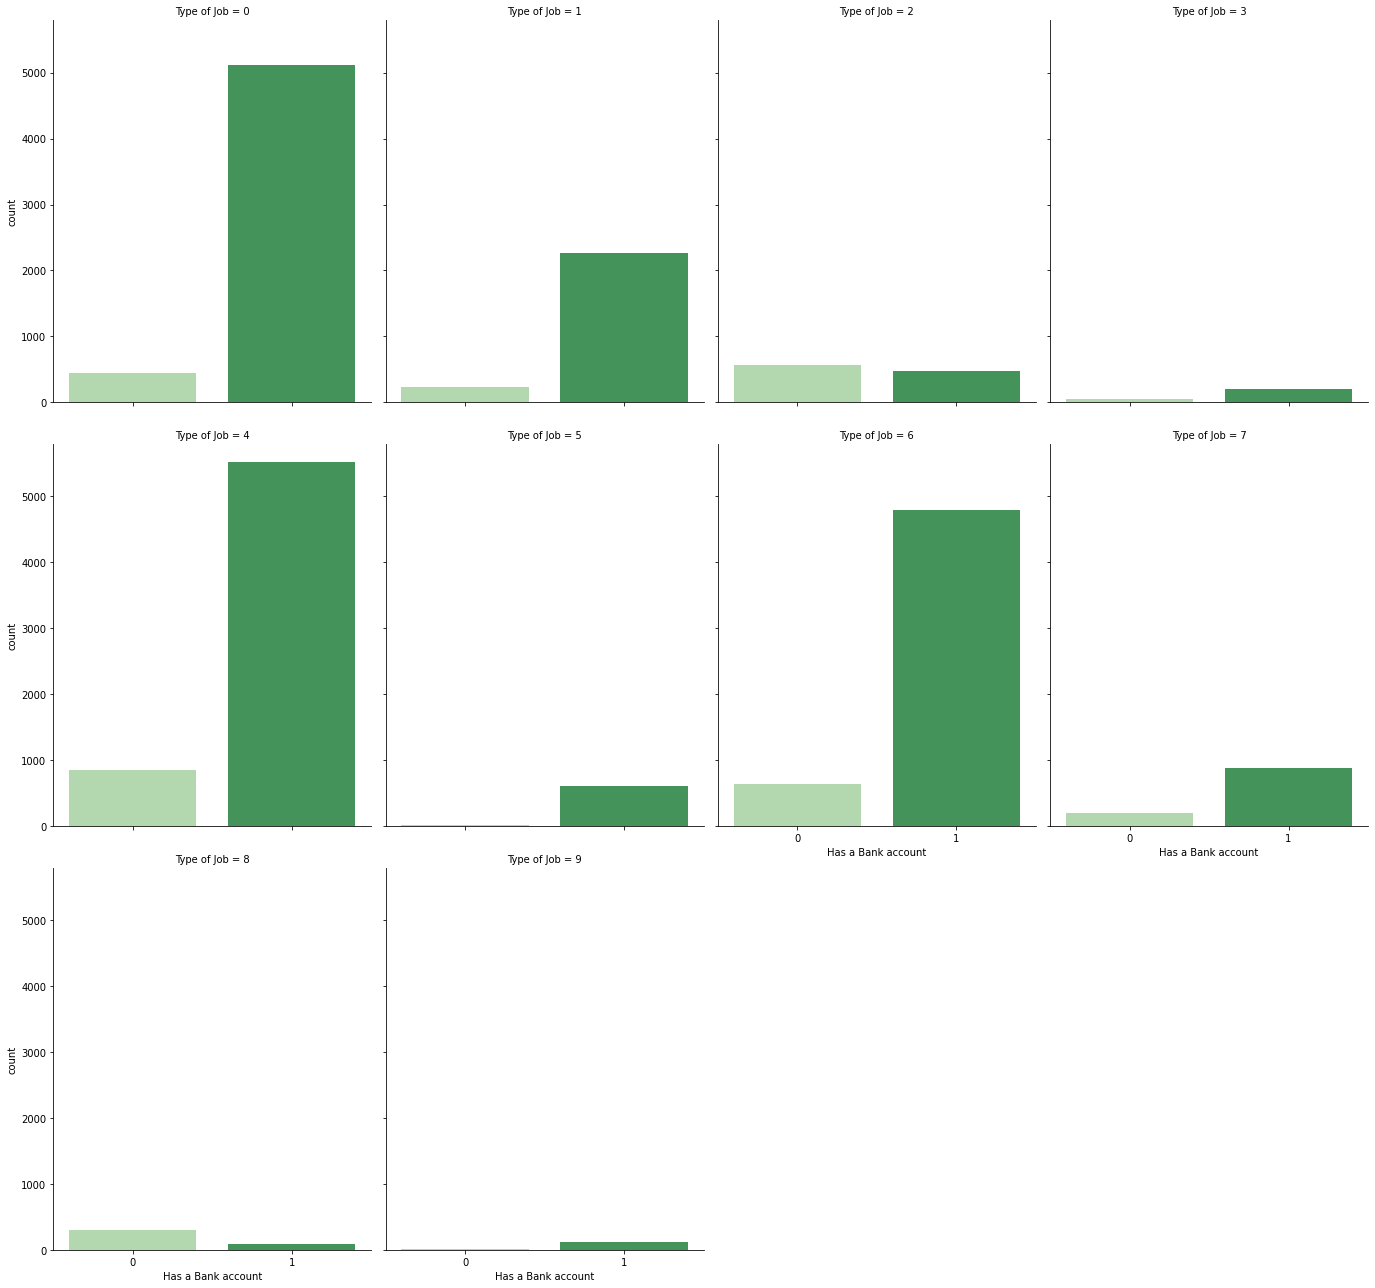

In [91]:
#The Idependnt Variables are
#Type of Location, Cell Phone Access, household_size, Respondent Age, gender_of_respondent, The relathip with head, marital_status, Level of Educuation, and Type of Job
#The Dependent Variable is 
#Has a bank account

sns.catplot("Has a Bank account", col="Cell Phone Access", col_wrap=4, data=Data1, kind="count", height=6, aspect=.8, palette='Greens')
sns.catplot("Has a Bank account", col="gender_of_respondent", col_wrap=4, data=Data1, kind="count", height=6, aspect=.8, palette='Greens')
sns.catplot("Has a Bank account", col="The relathip with head", col_wrap=4, data=Data1, kind="count", height=6, aspect=.8, palette='Greens')
sns.catplot("Has a Bank account", col="marital_status", col_wrap=4, data=Data1, kind="count", height=6, aspect=.8, palette='Greens')
sns.catplot("Has a Bank account", col="Level of Educuation", col_wrap=4, data=Data1, kind="count", height=6, aspect=.8, palette='Greens')
sns.catplot("Has a Bank account", col="Type of Job", col_wrap=4, data=Data1, kind="count", height=6, aspect=.8, palette='Greens')


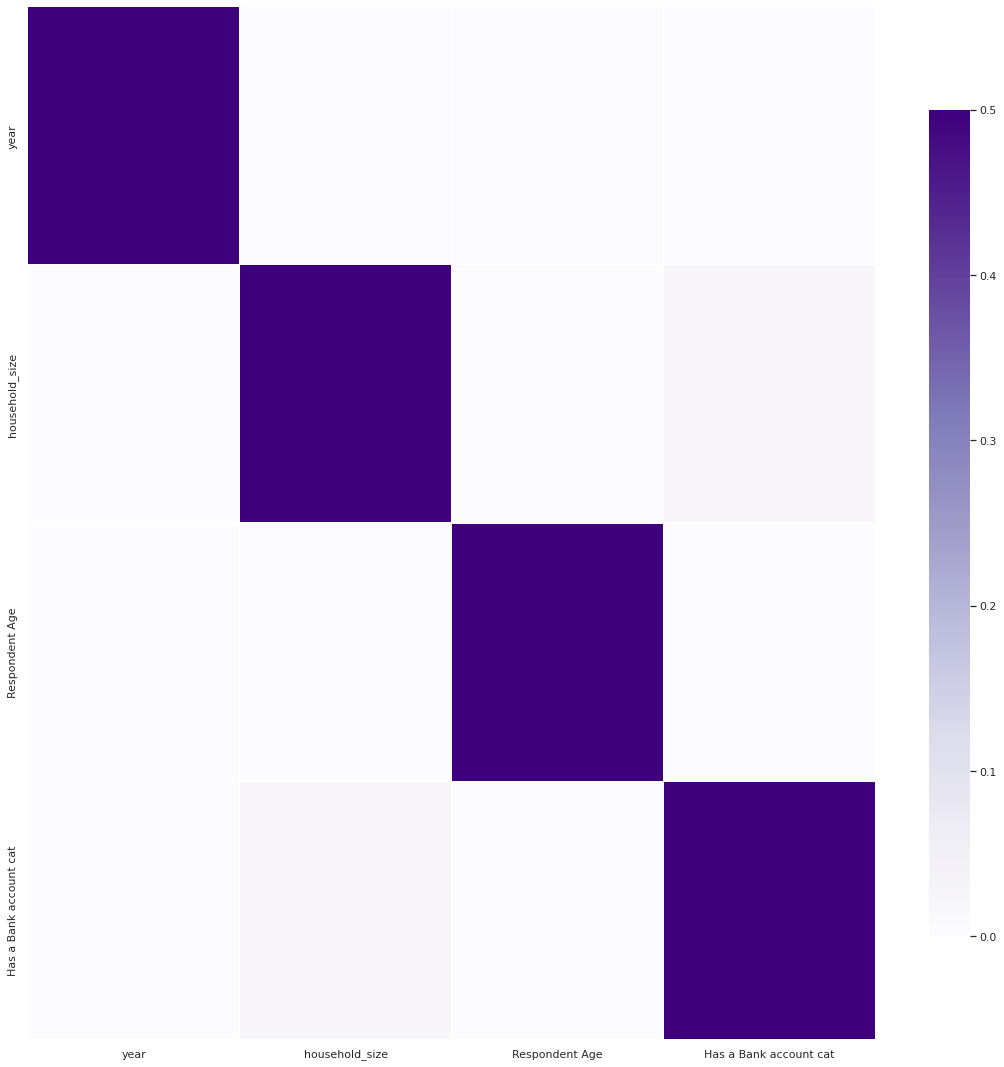

In [94]:
corr = Data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Purples", vmin= 0.0, vmax=0.5,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(19,19)})

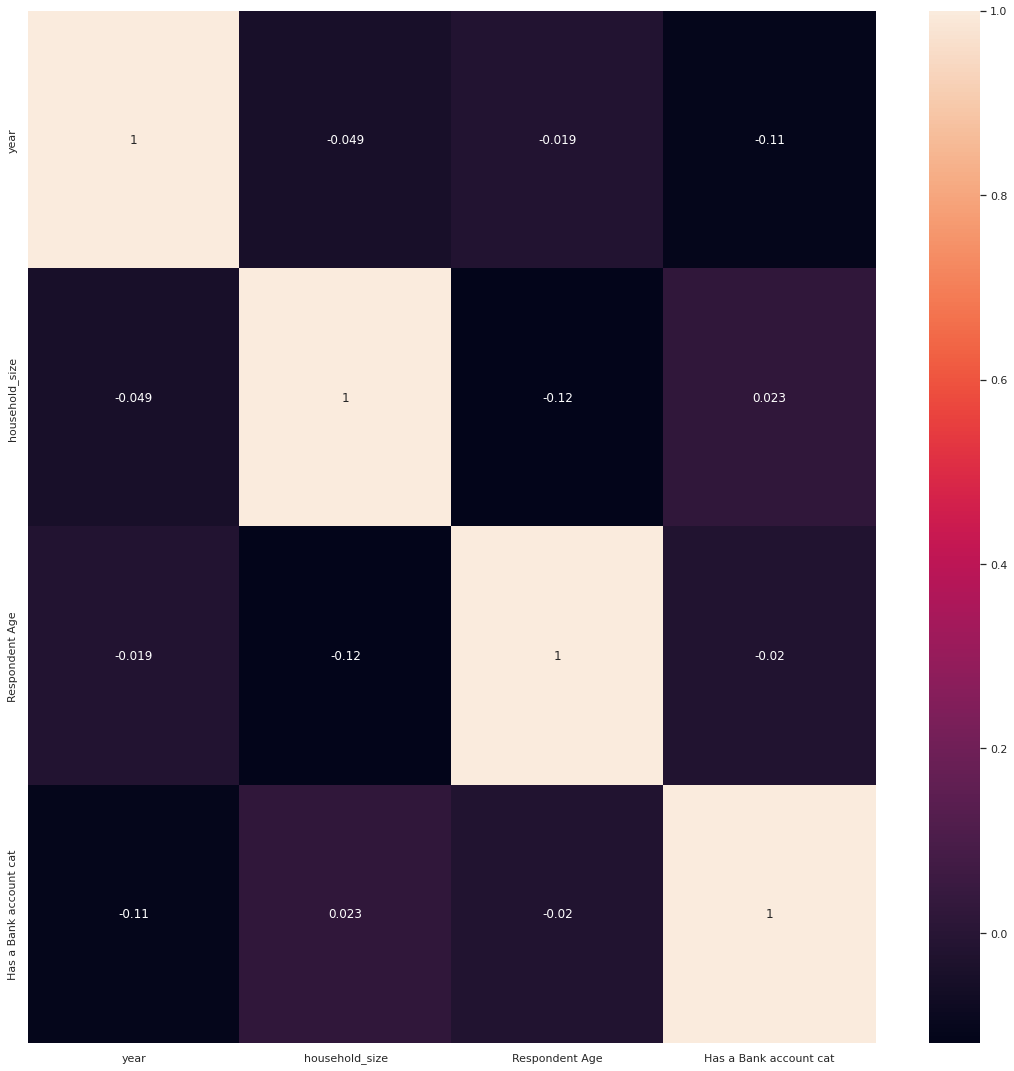

In [95]:
# heatmap
sns.heatmap(Data1.corr(),annot=True)
plt.show()